# Aim

##                    Predict whether the Employee of an Organization should get Promotion or Not?

# Probelm :


One of the problem  facing by MNC's nowadays is to  identify the right people for promotion and prepare them in time. So to ease this process we are building an automated setup for promotion process and trying predictive analytics to identify the employees who are most likely to get promoted in an organisation.

# Importing all the required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [4]:
# reading the dataset
train = pd.read_csv('train.csv')

In [5]:
# lets check the shape 
print("Shape of the Training Data :",train.shape)

Shape of the Training Data : (54808, 14)


In [6]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_greater_than_80', 'awards_won',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_greater_than_80,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
# values in Departments

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [9]:
# values in Region

train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [10]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_greater_than_80,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


It is quite clear that we are not having Outliers in our Dataset, the average training score for most of the Employee lie between 40 to 100, which is a very good distribution, also th mean is 50.

Also, the Length of service, is not having very disruptive values, so we can keep them for model training. they are not going to harm us a lot.

In [11]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


C:\Users\eldhos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


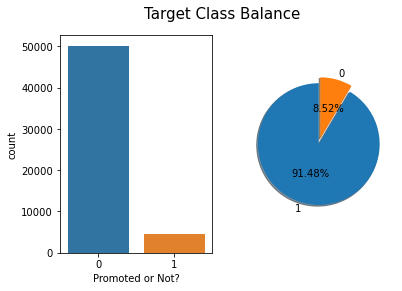

In [12]:
# lets check the Target Class Balance

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

we can easily, see that the Target Class is Highly Imbalanced, and we must balance these classes of Target Class. Most of the Times, when we use Machine Learning Models with Imbalanced Classes, we have very poor Results which are completely biased towards the class having Higher Distribution.

# Treatment of Missing Values


In [13]:
# lets calculate the total missing values in the dataset
train_total = train.isnull().sum()

train_missing_data = pd.concat([train_total],
                                axis=1, 
                                keys=['Train_Total','Test_Total'],
                                sort = True)


In [14]:
train_missing_data

,Train_Total
KPIs_greater_than_80,0
age,0
avg_training_score,0
awards_won,0
department,0
education,2409
employee_id,0
gender,0
is_promoted,0
length_of_service,0


We can see from the above table, that Only two columns have missing values in Train and Test Dataset both is education, and previous_year_rating respectively

In [15]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [16]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_greater_than_80      int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [17]:
# converting 'previous_year_rating' from float to int
train['previous_year_rating'] = train['previous_year_rating'].astype('float64')

In [18]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_greater_than_80      int64
awards_won                int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_greater_than_80  54808 non-null  int64  
 11  awards_won            54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


all missing values are treated in our dataset

# Outlier Detection

In [24]:
# Lets first analyze the Numberical Columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_greater_than_80,awards_won,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


from this data we understand in avg_training_score and length_of_service we suspect outliers so lets check that first

C:\Users\eldhos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eldhos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


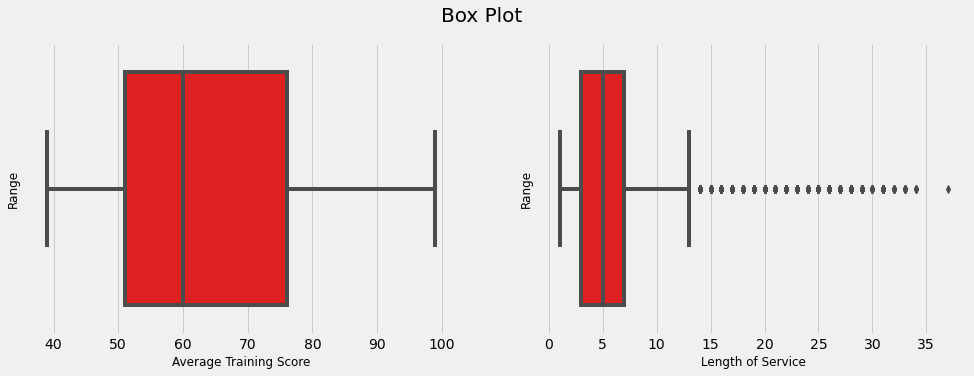

In [25]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

# Box plot for average training score
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# Box plot for length of service
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [26]:
# lets remove the outliers from the length of service column

train = train[train['length_of_service'] > 13]

In [27]:
# lets remove some of the columns which are not very useful for predicting the promotion
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

In [28]:
train.columns

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_greater_than_80',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

# Dealing with Categorical Columns

In [29]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [30]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [31]:
## Lets check the categorical columns present in the data
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [32]:
# lets check the value counts for the education column
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [33]:
# lets start encoding these categorical columns to convert them into numerical columns

# lets encode the education in their degree of importance 
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))


# lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])

train['gender'] = le.fit_transform(train['gender'])


# lets check whether we still have any categorical columns left after encoding
print(train.select_dtypes('object').columns)


Index([], dtype='object')


In [34]:
train.to_csv('train2.csv')

In [43]:
# lets check the data after encoding
train

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_greater_than_80,awards_won,avg_training_score,is_promoted
13,8,3,1,2,39,3.0,16,0,0,80,0
42,2,2,1,1,59,4.0,26,1,0,52,0
60,7,3,1,1,50,4.0,17,1,0,47,1
74,7,2,1,1,50,3.0,14,0,0,52,0
99,1,3,1,1,60,5.0,17,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...
54691,0,3,1,1,47,5.0,19,0,0,86,0
54695,4,2,0,2,52,5.0,18,1,0,56,1
54697,7,2,1,1,47,5.0,15,0,0,50,0
54754,8,2,0,1,42,3.0,14,0,0,79,0


In [36]:
x=train.drop(['is_promoted'],axis=1)
x

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_greater_than_80,awards_won,avg_training_score
13,8,3,1,2,39,3.0,16,0,0,80
42,2,2,1,1,59,4.0,26,1,0,52
60,7,3,1,1,50,4.0,17,1,0,47
74,7,2,1,1,50,3.0,14,0,0,52
99,1,3,1,1,60,5.0,17,0,0,59
...,...,...,...,...,...,...,...,...,...,...
54691,0,3,1,1,47,5.0,19,0,0,86
54695,4,2,0,2,52,5.0,18,1,0,56
54697,7,2,1,1,47,5.0,15,0,0,50
54754,8,2,0,1,42,3.0,14,0,0,79


In [37]:
y=train.is_promoted
y

13       0
42       0
60       1
74       0
99       0
        ..
54691    0
54695    1
54697    0
54754    0
54803    0
Name: is_promoted, Length: 3489, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
model.score(x_test,y_test)

0.9398280802292264

In [41]:
prediction = model.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :", prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]


In [42]:
import pickle
pickle.dump(model,open('emppre.pkl','wb'))